# Atomic array with N = 2

Analytical investigations

First case is $\bar{r} = r \cdot \hat{e}_x$ and $\bar{d} = \hat{e}_x$. 

For this, the decay rates can be determined analytically (following Asenjo-Garcia et al. as in numerical calculations): $\Gamma_{\pm} = 1 \mp \frac{e}{r^3} \cdot (r \cdot cos(r) + sin(r))$

In [1]:
import numpy as np
import matplotlib.pyplot as plt

N = 1000
lower_bound = 1/100000
upper_bound = 1/1000
r = np.linspace(lower_bound, upper_bound, N)
d_lambda0 = r*2*np.pi

gamma_p = lambda r: -1 - 3/r**3 * (r*np.cos(r) + np.sin(r))
gamma_m = lambda r: -1 + 3/r**3 * (r*np.cos(r) + np.sin(r))

y_p = gamma_p(d_lambda0)
y_m = gamma_m(d_lambda0)


## Numerical comparison:

At distance  6.283185307179587e-05 , the lowest decay rate:  -3.3416496816873753e-07 , and highest decay rate:  2.0000003341649686
At distance  6.905843310593781e-05 , the lowest decay rate:  -5.328469655785373e-08 , and highest decay rate:  2.0000000532846958
At distance  7.528501314007973e-05 , the lowest decay rate:  -5.3284696571731516e-08 , and highest decay rate:  2.0000000532846958
At distance  8.151159317422165e-05 , the lowest decay rate:  1.6935371077719807e-08 , and highest decay rate:  1.999999983064629
At distance  8.773817320836359e-05 , the lowest decay rate:  1.6935370911186354e-08 , and highest decay rate:  1.999999983064628
At distance  9.396475324250553e-05 , the lowest decay rate:  8.715543889370458e-08 , and highest decay rate:  1.9999999128445598
At distance  0.00010019133327664747 , the lowest decay rate:  1.6935370855675203e-08 , and highest decay rate:  1.9999999830646285
At distance  0.0001064179133107894 , the lowest decay rate:  1.693537100833087e-08 , and h

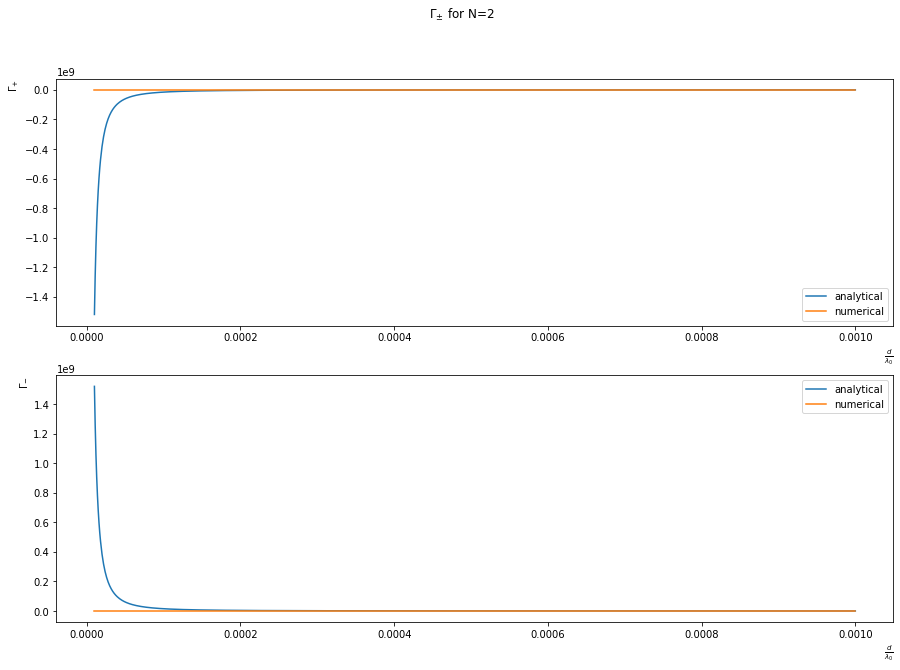

In [4]:
import Lattice
import Hamiltonian
from GreensTensor import fill_G
from utils import *

lattice = Lattice.Lattice()
block = Hamiltonian.Hamiltonian()

N = 2
def calc_rates(d):
    lattice.linlat(N, d, ex, ex)        #initialize linear lattice
    pos, rij, pola = lattice.getPositions(), lattice.getDisplacements(), lattice.getPolarizations()

    #Linear parallel case:
    G = fill_G(N, rij)

    block.block(N, G, pola)       #initialize block hamiltonian with N dipoles and calculated G (vacuum) and ex pola direction.
    block.eigenDecomposition()

    #decay rates:
    decay_rates = block.getDecayRates()
    return decay_rates

gamma_1 = []
gamma_2 = []
for rs in d_lambda0:
    g = calc_rates(rs)
    gamma_1.append(g[0])
    gamma_2.append(g[1])
    print("At distance ", rs, ", the lowest decay rate: ", g[0], ", and highest decay rate: ", g[1])

gamma_1 = np.array(gamma_1)
gamma_2 = np.array(gamma_2)
#print(gamma_1)
fig, ax = plt.subplots(nrows=2)
fig.suptitle(r"$\Gamma_{\pm}$ for N=2")
fig.set_size_inches(15, 10)

ax[0].plot(r, y_p, label = "analytical")
ax[1].plot(r, y_m, label = "analytical")

ax[0].set_xlabel(r"$\frac{d}{\lambda_0}$", loc="right")
ax[1].set_xlabel(r"$\frac{d}{\lambda_0}$", loc="right")

ax[0].set_ylabel(r"$\Gamma_{+}$", loc="top")
ax[1].set_ylabel(r"$\Gamma_{-}$", loc="top")

ax[0].plot(r, gamma_1, label="numerical")
ax[1].plot(r, gamma_2, label="numerical")

ax[0].legend()
ax[1].legend()